## Importing Packages

In [91]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for data preparation
import re
from sklearn.utils import resample
from sklearn import preprocessing
# Libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

#Mute warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
#show full value of dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [92]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [93]:
train.sample(3)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
4905,4905,A,108.72,material_7,material_8,9,5,2,6,10,16.966,12.966,16.938,16.973,11.554,19.109,12.385,15.756,16.974,11.749,15.957,15.602,14.986,14.587,695.902,0
23772,23772,E,154.03,material_7,material_6,6,9,2,13,7,16.147,9.885,18.679,18.188,12.572,18.096,11.604,15.535,19.755,11.919,NaN,15.138,16.999,18.423,683.836,1
3257,3257,A,131.59,material_7,material_8,9,5,6,7,4,18.398,10.404,17.038,16.002,11.336,18.197,10.591,16.446,19.507,10.120,15.407,17.082,18.426,14.944,560.888,1


In [94]:
test.sample(3)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
3460,30030,F,115.15,material_5,material_6,6,4,5,25,10,16.741,12.346,17.374,16.386,11.217,17.876,12.115,16.239,18.981,14.105,13.460,15.847,14.179,15.394,619.086
12344,38914,H,85.36,material_7,material_7,7,9,3,8,9,18.126,12.317,18.173,16.635,11.622,19.387,10.902,16.999,19.519,13.383,18.508,15.448,12.560,17.199,776.521
5866,32436,G,118.99,material_5,material_6,9,7,5,6,9,18.455,12.887,17.301,18.271,11.107,18.749,10.638,18.592,20.030,11.717,16.001,17.745,13.909,18.093,781.805


In [95]:
train.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure'],
      dtype='object')

In [96]:
train.shape

(26570, 26)

In [97]:
test.shape

(20775, 25)

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [99]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,26570.0,13284.500000,7670.242662,0.000,6642.25000,13284.5000,19926.75000,26569.000
loading,26320.0,127.826233,39.030020,33.160,99.98750,122.3900,149.15250,385.860
attribute_2,26570.0,6.754046,1.471852,5.000,6.00000,6.0000,8.00000,9.000
attribute_3,26570.0,7.240459,1.456493,5.000,6.00000,8.0000,8.00000,9.000
measurement_0,26570.0,7.415883,4.116690,0.000,4.00000,7.0000,10.00000,29.000
measurement_1,26570.0,8.232518,4.199401,0.000,5.00000,8.0000,11.00000,29.000
measurement_2,26570.0,6.256568,3.309109,0.000,4.00000,6.0000,8.00000,24.000
measurement_3,26189.0,17.791528,1.001200,13.968,17.11700,17.7870,18.46900,21.499
measurement_4,26032.0,11.731988,0.996085,8.008,11.05100,11.7330,12.41000,16.484
measurement_5,25894.0,17.127804,0.996414,12.073,16.44300,17.1320,17.80500,21.425


In [100]:
train['failure'].value_counts()

0    20921
1     5649
Name: failure, dtype: int64

<AxesSubplot:xlabel='failure', ylabel='count'>

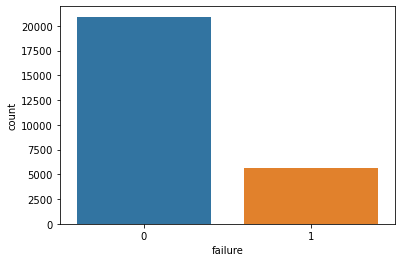

In [101]:
sns.countplot(x = 'failure', data = train)

In [102]:
train['product_code'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [103]:
test['product_code'].unique()

array(['F', 'G', 'H', 'I'], dtype=object)

In [104]:
# Review the amount of empty in the dataframe
train.isna().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [105]:
test.isna().sum()

id                   0
product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

## Feature Engineering

In [106]:
train['train'] = 1
test['train'] = 0
train_test = pd.concat([train, test])

In [107]:
train_test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,train
0,0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0.0,1
1,1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0.0,1
2,2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0.0,1
3,3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0.0,1
4,4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0.0,1


In [108]:
train_test.shape

(47345, 27)

In [109]:
for name, values in train_test.iteritems():
    if train_test[name].isna().sum() > 0:
        #Finding the mean of the column having NaN
        mean_value = train_test[name].mean()
        train_test[name].fillna(value=mean_value, inplace=True)
train_test.isna().sum().sum()

0

In [110]:
le = preprocessing.LabelEncoder()
train_test['product_code'] = le.fit_transform(train_test['product_code'])
train_test['attribute_0'] = le.fit_transform(train_test['attribute_0'])
train_test['attribute_1'] = le.fit_transform(train_test['attribute_1'])

In [111]:
Train =train_test[train_test["train"] == 1]
Test = train_test[train_test["train"] == 0]

Test = Test.reset_index(drop=True)

In [112]:
Train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,train
0,0,0,80.10,1,3,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594000,15.193,15.029,16.081604,13.034,14.684,764.100,0.0,1
1,1,0,84.89,1,3,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915000,11.755,14.732,15.425000,14.395,15.631,682.057,0.0,1
2,2,0,82.43,1,3,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,19.029202,13.798,16.711,18.631000,14.094,17.946,663.376,0.0,1
3,3,0,101.07,1,3,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377000,10.020,15.250,15.562000,16.154,17.172,826.282,0.0,1
4,4,0,188.06,1,3,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932000,12.428,16.182,12.760000,13.153,16.412,579.885,0.0,1


In [113]:
Train = Train.drop('train',axis=1)

In [114]:
Test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,train
0,26570,5,119.57,0,1,6,4,6,9,6,19.305,10.178,17.534,18.168,11.598,18.654,10.802,15.909,18.070000,13.772,13.659,16.825,13.742,17.710,634.612,0.212608,0
1,26571,5,113.51,0,1,6,4,11,8,0,17.883,11.927,17.228,16.033,11.179,19.368,12.032,13.998,19.029202,12.473,17.468,16.708,14.776,14.102,537.037,0.212608,0
2,26572,5,112.16,0,1,6,4,8,12,4,18.475,10.481,16.619,18.189,12.126,17.774,11.743,17.046,18.086000,10.907,13.363,15.737,17.065,16.021,658.995,0.212608,0
3,26573,5,112.72,0,1,6,4,8,11,10,16.518,10.888,15.293,18.592,11.304,18.948,11.790,18.165,16.163000,10.933,15.501,15.667,12.620,16.111,594.301,0.212608,0
4,26574,5,208.00,0,1,6,4,14,16,8,17.808,12.693,17.678,15.814,13.431,19.141,12.370,14.578,17.849000,11.941,16.070,16.183,13.324,17.150,801.044,0.212608,0


In [115]:
Test = Test.drop(['train','failure'],axis=1)

In [116]:
Train.shape, Test.shape

((26570, 26), (20775, 25))

In [117]:
y = Train['failure']
X = Train.drop(['failure'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [118]:
rf = RandomForestClassifier(n_estimators = 200,
                            min_samples_split=2,
                            min_samples_leaf=2,
                            max_features='auto',
                            max_depth=30,
                            bootstrap=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=2,
                       n_estimators=200)

In [119]:
y_pred = rf.predict(X_test)
metrics.roc_auc_score(y_test, y_pred, average=None)

0.5002241251732138

In [120]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
params = {'boosting_type': 'gbdt',
              'objective': 'regression',
              'num_leaves': 40,
              'learning_rate': 0.1,
              'feature_fraction': 0.9
              }
feature_name = list(X.columns)
evals={}
gbm = lgb.train(
                params,
                lgb_train,
                num_boost_round=200,
                callbacks = [lgb.record_evaluation(evals)],
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['train','valid']
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4433
[LightGBM] [Info] Number of data points in the train set: 18599, number of used features: 25
[LightGBM] [Info] Start training from score 0.215065


In [121]:
pred = gbm.predict(X_test)
metrics.roc_auc_score(y_test, pred, average=None)

0.5466962136514821

## Hyperparameter tuning

In [126]:
'''
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
'''

"\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# Number of trees in random forest\nn_estimators = [int(x) for x in range(200,2000,200)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\nprint(random_grid)\n"

In [127]:
'''
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
'''

'\n# Use the random grid to search for best hyperparameters\n# First create the base model to tune\nrf = RandomForestClassifier()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n# Fit the random search model\nrf_random.fit(X_train, y_train)\n'

In [128]:
#rf_random.best_params_